# 자치구별 평균 실거래 매매가

In [1]:
import pandas as pd

tps = [] # transaction_price_seoul
tps.append(pd.read_csv("../data/mean_price_seoul/2011년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2012년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2013년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2014년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2015년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2016년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2017년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2018년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2019년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2020년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2021년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2022년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))
tps.append(pd.read_csv("../data/mean_price_seoul/2023년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15))





In [2]:
tps_mean = []

for idx in range(len(tps)):
    tps[idx]['거래금액(만원)'] = tps[idx]['거래금액(만원)'].str.replace(",","").astype('int64')
    tps[idx]['구'] = tps[idx]['시군구'].str.split().str[1]
    tps_mean.append(tps[idx].groupby("구")["거래금액(만원)"].mean())
    tps_mean[idx] = pd.DataFrame(tps_mean[idx])
    tps_mean[idx] = tps_mean[idx].rename(columns={'거래금액(만원)': str(2011+idx)+'년'})
    
    #tps_mean[idx] = tps_mean[idx].sort_values(by="거래금액(만원)", axis=0, ascending=True)
    #tps_mean[idx]['순위'] = range(1, len(tps_mean[idx])+1 )
    #tps_mean[idx][str(idx + 2018)+"년"] = range(1, len(tps_mean[idx])+1 )
    #tps_mean[idx] = tps_mean[idx].drop('거래금액(만원)', axis=1)


merge_tps = pd.concat(tps_mean, axis =1)
merge_tps.head()


,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
구,,,,,,,,,,,,,
강남구,84573.439288,82577.604089,83772.970641,88069.923758,94114.637715,107345.743863,127428.113756,153334.085584,171860.133333,183945.526358,207144.448980,199734.679267,217075.743601
강동구,43404.086628,43170.996424,41471.244745,41454.902934,45726.793499,50555.091263,58066.038418,64973.058298,70823.594378,83822.653365,93626.194037,85088.644689,100625.563645
강북구,30603.733706,29788.926708,30546.154255,31795.288599,32514.594753,35667.490246,36844.074906,42267.334846,50455.060729,55941.708774,66786.311230,50226.363636,50659.730047
강서구,33756.602273,31812.108925,32557.948651,34389.259458,36138.141514,42335.444335,46636.686225,53062.572860,62765.460030,67700.339295,79163.403564,65631.551111,74637.417035
관악구,35453.903628,32117.926632,32607.376671,34610.493629,36519.630295,38176.858757,40731.305946,47146.787539,57172.614841,61851.565089,72948.668005,63250.239234,67333.760933


In [3]:
merge_tps = merge_tps.transpose()
#merge_tps = merge_tps.drop(columns=['강남구','서초구','용산구','송파구','성동구'])
merge_tps.to_csv("../data/yjs/05_Gu_Seoul_MeanPrice_yjs.csv")
merge_tps

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
2011년,84573.439288,43404.086628,30603.733706,33756.602273,35453.903628,53639.918594,32034.843771,26394.790960,27568.325564,26834.547842,...,45470.146628,36689.328912,66350.499045,48318.359690,45480.084464,75028.889862,36872.206067,46480.565401,46075.471624,29972.140294
2012년,82577.604089,43170.996424,29788.926708,31812.108925,32117.926632,54066.690088,30305.687808,25514.827586,25179.003724,25240.773839,...,48748.873429,34142.936080,64345.354600,46526.634974,39083.177334,70802.301303,34580.576259,51728.917275,54232.934599,28718.235339
2013년,83772.970641,41471.244745,30546.154255,32557.948651,32607.376671,51657.925955,31092.390493,24854.171144,26367.272610,25922.967722,...,47154.332592,34371.128463,63571.797683,45034.504741,40368.125228,66238.950873,34026.370707,49679.541744,53921.450461,28724.380223
2014년,88069.923758,41454.902934,31795.288599,34389.259458,34610.493629,54583.124237,32182.634173,26043.176594,27097.861055,26551.093674,...,50525.617092,36195.691516,63398.261599,46779.091653,41389.458136,77198.141830,34446.918232,45113.061224,50270.178022,30329.973750
2015년,94114.637715,45726.793499,32514.594753,36138.141514,36519.630295,56313.125506,33595.133421,28466.564103,28689.521806,27713.384182,...,52456.848593,39236.501857,66872.152979,48073.042850,44217.391991,77455.773438,36225.513457,48893.827381,54591.111888,30069.114525
2016년,107345.743863,50555.091263,35667.490246,42335.444335,38176.858757,58852.701571,35768.079696,31654.528051,31041.986214,29806.195352,...,58172.121957,42902.890920,74066.552719,53586.476275,49775.028516,97188.942586,40660.049589,54521.529483,60607.086713,32332.040620
2017년,127428.113756,58066.038418,36844.074906,46636.686225,40731.305946,66547.224456,39117.495733,33414.036137,34202.898344,32529.004356,...,67076.131538,44413.727754,85185.478341,63403.069193,56196.386308,108361.708907,43267.234414,56530.076074,60951.578904,35101.753503
2018년,153334.085584,64973.058298,42267.334846,53062.572860,47146.787539,80293.564682,43341.293873,37864.283879,38807.882943,35758.010212,...,81914.599304,49755.966404,98797.662360,65974.948209,66620.986128,132350.548049,48517.378081,61515.447514,68925.857478,39454.510742
2019년,171860.133333,70823.594378,50455.060729,62765.460030,57172.614841,99855.681818,53065.272549,44284.962406,43256.025024,43606.190476,...,101021.176471,60545.678233,120185.180085,80146.139785,78141.905312,131820.952096,59257.206490,84162.771084,80766.569767,39134.465116
2020년,183945.526358,83822.653365,55941.708774,67700.339295,61851.565089,106705.457364,54439.536629,47037.735571,52201.001323,45698.306381,...,114341.003946,68692.091575,130260.409071,89062.088564,89835.664049,152260.597776,62448.387489,80060.838346,92392.271401,50945.041351


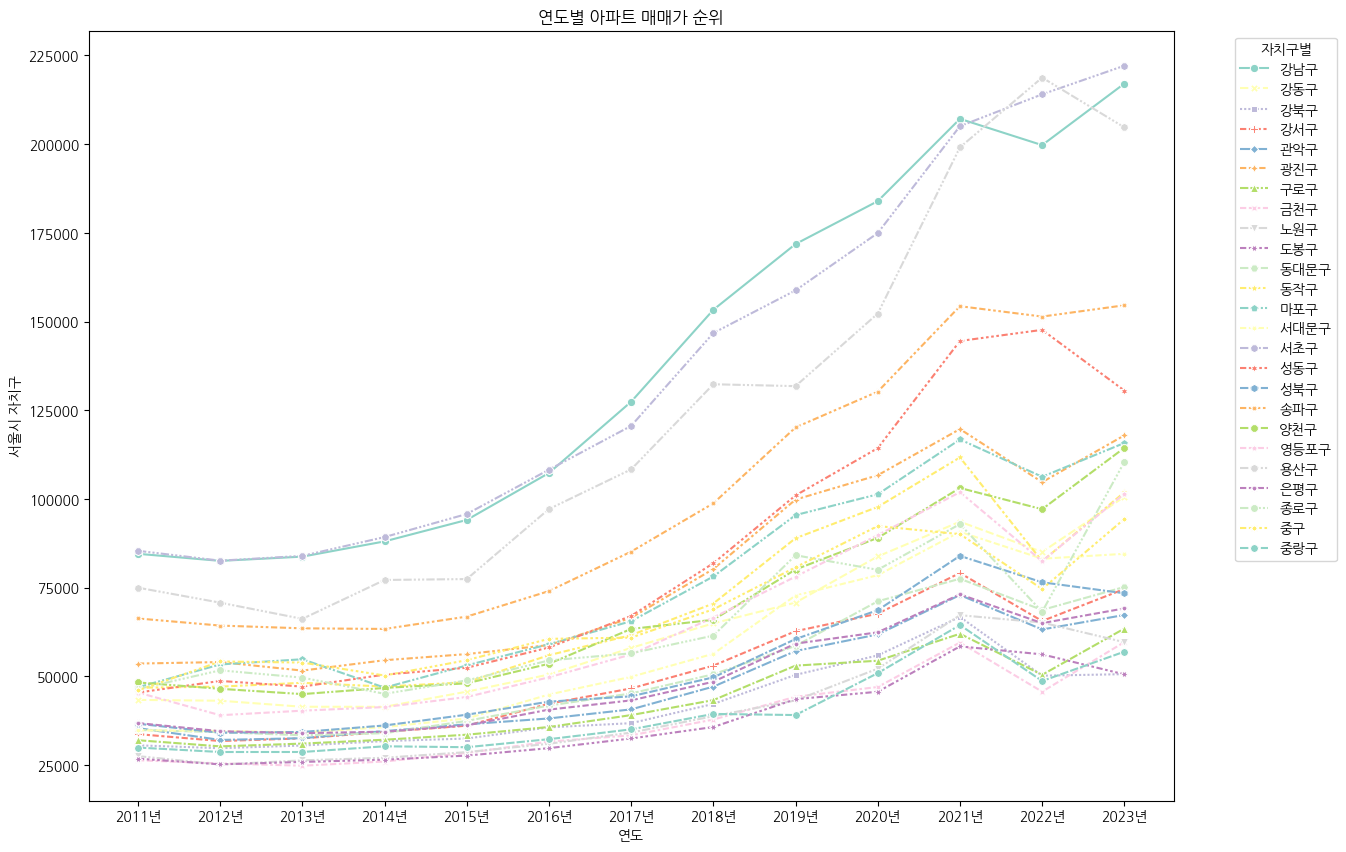

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(14, 10))
sns.lineplot(data=merge_tps,markers=True, palette='Set3')
plt.title('연도별 아파트 매매가 순위')
plt.xlabel('연도')
plt.ylabel('서울시 자치구')
plt.legend(title='자치구별', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [5]:
import plotly.express as px

px.line(merge_tps)

In [6]:
merge_tps2 = merge_tps.drop(columns=['강남구','서초구','용산구','송파구','성동구'])
px.line(merge_tps2)

# 자치구별 거래량

In [7]:
import pandas as pd

volume = pd.read_excel("../data/서울_아파트거래량_연도별.xlsx", engine='openpyxl', header=10)
volume.head()

,지 역,Unnamed: 1,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,서울,NaN,182299,88448,88171,104452,66301,80537,60840,91017,124778,156337,155052,165213,161086,129610,166847,93648,41207,77917
1,NaN,종로구,1297,953,1517,829,498,680,628,1108,1042,1447,1336,2562,1240,966,1181,838,345,369
2,NaN,중구,2004,996,824,2045,1696,1274,1689,1085,1711,2483,2493,2257,2107,1400,2134,1654,1096,669
3,NaN,용산구,3869,2955,1426,2123,1691,1480,945,1574,2373,2810,3960,5022,4557,2119,4103,1744,780,822
4,NaN,성동구,5994,1889,2328,3730,1785,2615,1726,3020,5271,8479,6814,7036,4740,3883,4906,2632,1724,2948


In [8]:
volume.drop(index=0, inplace=True)
volume.drop(columns=['지 역'], inplace=True)
volume.drop(columns=volume.columns[1:6], inplace=True)
volume.set_index('Unnamed: 1', inplace=True)
volume.rename_axis('구별', inplace=True)
#volume.rename(columns={'Unnamed: 1' : '연도별'}, inplace=True)
#volume.index
volume.head()

,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
구별,,,,,,,,,,,,,
종로구,680,628,1108,1042,1447,1336,2562,1240,966,1181,838,345,369
중구,1274,1689,1085,1711,2483,2493,2257,2107,1400,2134,1654,1096,669
용산구,1480,945,1574,2373,2810,3960,5022,4557,2119,4103,1744,780,822
성동구,2615,1726,3020,5271,8479,6814,7036,4740,3883,4906,2632,1724,2948
광진구,1615,1369,1338,2258,2535,2630,3049,2560,2957,2886,1266,805,1788


In [9]:
volume = volume.transpose()
volume.to_csv("../data/yjs/06_GU_Seoul_Volume_yjs.csv")
volume.head()

구별,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2011년,680,1274,1480,2615,1615,3326,2547,4671,1595,3169,...,4029,5163,1049,2763,3298,2270,3908,5610,5443,4919
2012년,628,1689,945,1726,1369,2556,2016,2934,1089,2247,...,2536,2725,1006,2746,2782,2052,3538,5026,4648,3357
2013년,1108,1085,1574,3020,1338,3784,2894,4157,1459,3745,...,4774,3931,1702,3784,3943,2588,5949,6535,10234,4234
2014년,1042,1711,2373,5271,2258,5573,5370,5299,2022,4011,...,9107,6272,2433,5137,3763,3487,9391,10870,8387,5540
2015년,1447,2483,2810,8479,2535,6405,4662,7585,2952,5569,...,9902,6928,3348,6709,5824,4621,7744,9765,9783,8052


In [11]:
import plotly.express as px

px.line(volume)
#plt.ylabel('거래량')

In [12]:
df_nowon = pd.concat([merge_tps['노원구'], volume['노원구']], axis=1, keys=['매매가','거래량'])
df_nowon.to_csv("../data/yjs/07_GU_Nowon_Volume_yjs.csv")
df_nowon

,매매가,거래량
2011년,27568.325564,6397
2012년,25179.003724,4841
2013년,26367.272610,7249
2014년,27097.861055,9458
2015년,28689.521806,13017
2016년,31041.986214,13346
2017년,34202.898344,12576
2018년,38807.882943,11480
2019년,43256.025024,8917
2020년,52201.001323,13162


In [13]:
df_jongro = pd.concat([merge_tps['종로구'], volume['종로구']], axis=1, keys=['매매가','거래량'])
df_jongro.to_csv("../data/yjs/08_GU_Jongro_Volume_yjs.csv")
df_jongro

,매매가,거래량
2011년,46480.565401,680
2012년,51728.917275,628
2013년,49679.541744,1108
2014년,45113.061224,1042
2015년,48893.827381,1447
2016년,54521.529483,1336
2017년,56530.076074,2562
2018년,61515.447514,1240
2019년,84162.771084,966
2020년,80060.838346,1181


Text(0, 0.5, '종로 거래량')

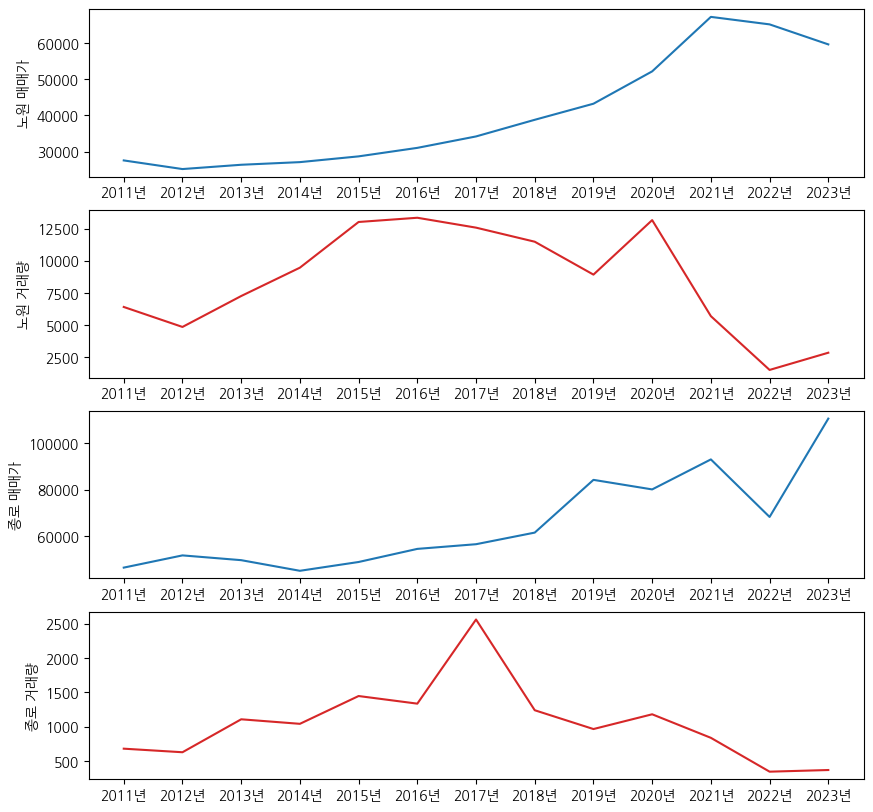

In [14]:
fig, axs = plt.subplots(4,1,figsize=(10,10))
#axs2 = axs.twinx()

#color = 'tab:red'
axs[0].plot(df_nowon.index, df_nowon['매매가'])
axs[0].set_ylabel('노원 매매가')

axs[1].plot(df_nowon.index, df_nowon['거래량'],color='tab:red')
axs[1].set_ylabel('노원 거래량')
#axs2[0].plot(df_nowon.index, df_nowon['거래량'])

axs[2].plot(df_jongro.index, df_jongro['매매가'])
axs[2].set_ylabel('종로 매매가')

axs[3].plot(df_jongro.index, df_jongro['거래량'],color='tab:red')
axs[3].set_ylabel('종로 거래량')
#ax2 = ax1.twinx()
#ax2.plot(data=df)

In [15]:
px.line(df_jongro)